
# 🎓 Student Performance Prediction Project
### Predicting Math Scores Using Machine Learning

This project analyzes student performance data and builds machine learning models to predict **math scores** based on demographic and academic features.

We explore the dataset, preprocess it, train two models (Linear Regression and Random Forest), evaluate their performance, and visualize key insights such as feature importance and correlations.


## 1. Load the Dataset

## 2. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3. Encode Categorical Columns

## 4. Train/Test Split

## 5. Model 1 — Linear Regression

Linear Regression MSE: 29.095169866715487
Linear Regression RMSE: 5.393993869732843
Linear Regression R²: 0.8804332983749565


## 6. Model 2 — Random Forest Regressor

Random Forest MSE: 36.69565650921202
Random Forest RMSE: 6.057693992701515
Random Forest R²: 0.8491990721184489


## 7. Visualization — Actual vs Predicted

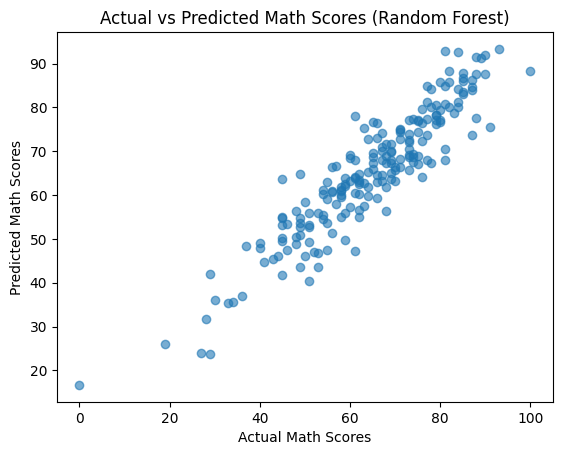

## 8. Correlation Heatmap

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [1]:
# ============================
# 🎓 Student Performance Prediction Project
# ============================

from IPython.display import Markdown, display

display(Markdown("""
# 🎓 Student Performance Prediction Project
### Predicting Math Scores Using Machine Learning

This project analyzes student performance data and builds machine learning models to predict **math scores** based on demographic and academic features.

We explore the dataset, preprocess it, train two models (Linear Regression and Random Forest), evaluate their performance, and visualize key insights such as feature importance and correlations.
"""))

# ----------------------------
# Import Libraries
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

display(Markdown("## 1. Load the Dataset"))

df = pd.read_csv("StudentsUni_performance.csv")
df.head()

display(Markdown("## 2. Exploratory Data Analysis (EDA)"))

df.info()
df.describe()

display(Markdown("## 3. Encode Categorical Columns"))

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

display(Markdown("## 4. Train/Test Split"))

X = df_encoded.drop("math score", axis=1)
y = df_encoded["math score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

display(Markdown("## 5. Model 1 — Linear Regression"))

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Linear Regression R²:", r2_score(y_test, lr_pred))

display(Markdown("## 6. Model 2 — Random Forest Regressor"))

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest R²:", r2_score(y_test, rf_pred))

display(Markdown("## 7. Visualization — Actual vs Predicted"))

plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores (Random Forest)")
plt.show()

display(Markdown("## 8. Correlation Heatmap"))

plt.figure
